In [62]:
#Chapter 3 MRA - Describing Data 

import pandas as pd
#store_sales = pd.read_csv('http://bit.ly/PMR-ch3') # quick way to get simulated data

In [63]:
#Setting the structure

#import numpy and pandas
import pandas as pd
import numpy as np

#Constants
N_STORES = 20
N_WEEKS = 104

#create a dataframe of initially missing values to hold the data
columns = ('store_num','year','week','p1_sales','p2_sales','p1_price','p2_price','p1_promo','p2_promo','country')
n_rows = N_STORES * N_WEEKS
store_sales = pd.DataFrame(np.empty(shape=(n_rows,10)),
                           columns=columns)
# print(store_sales.shape)
# print(store_sales.head())

#fill in store numbers
store_numbers = range(101,101 + N_STORES)
# print(list(store_numbers))

#fill in store country
store_country = dict(zip(store_numbers,
                         ['USA','USA','USA','DEU','DEU','DEU',
                          'DEU','DEU','GBR','GRB','GRB','BRA',
                          'BRA','JPN','JPN','JPN','JPN','AUS',
                          'CHN','CHN']))
# print(store_country)

#Starting to fill in store_sales
i = 0 # track row count
for store_num in store_numbers:
    for year in [1,2]:
        for week in range (1,53):
            store_sales.loc[i, 'store_num'] = store_num # setting store number
            store_sales.loc[i, 'year'] = year # setting year
            store_sales.loc[i, 'week'] = week # setting week
            store_sales.loc[i, 'country'] = store_country[store_num] # setting store country based on store num
            i += 1 # incrememnts a variable by the amount given, adds 1 to i and stores back into i 
                # This is shorthand for i = i + 1
# print(store_sales.head())

# print(store_sales.dtypes)

#Assigning cateogorical values to country and store number
store_sales.country = store_sales.country.astype(pd.CategoricalDtype())
store_sales.store_num = store_sales.store_num.astype(pd.CategoricalDtype())
# print(store_sales.country.head())
# print(store_sales.store_num.head())
# print(store_sales.dtypes)


#Checking the data
# print(store_sales.head(5))
# print(store_sales.tail(5))
# print(store_sales.sample(5))

store_sales.sample(10)

/var/folders/m8/j9f34b0132b375sgqgzj51240000gn/T/ipykernel_81221/3788018524.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'USA' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  store_sales.loc[i, 'country'] = store_country[store_num] # setting store country based on store num


,store_num,year,week,p1_sales,p2_sales,p1_price,p2_price,p1_promo,p2_promo,country
222,103.0,1.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,USA
646,107.0,1.0,23.0,2.990000e+00,2.290000,2.490000e+00,2.290000e+00,2.190000e+00,2.190000e+00,DEU
268,103.0,2.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,USA
98,101.0,2.0,47.0,9.000000e+01,93.000000,1.010000e+02,1.270000e+02,9.100000e+01,7.900000e+01,USA
2062,120.0,2.0,35.0,2.110000e+02,121.000000,1.430000e+02,1.280000e+02,1.140000e+02,1.540000e+02,CHN
1602,116.0,1.0,43.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,JPN
527,106.0,1.0,8.0,6.321918e-246,-0.003883,1.967722e+243,-7.068507e-11,2.051964e+272,4.453596e-200,DEU
285,103.0,2.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,USA
89,101.0,2.0,38.0,6.400000e+01,108.000000,1.150000e+02,8.100000e+01,1.180000e+02,8.800000e+01,USA
86,101.0,2.0,35.0,8.800000e+01,84.000000,1.050000e+02,7.900000e+01,7.500000e+01,1.140000e+02,USA


In [64]:
#Store Data Simulating Data Points

#setting seed for replicatable data
np.random.seed(37204)

#Randomly determining promotions
#10% chance of promoted
store_sales.p1_promo = np.random.binomial(n = 1, p = 0.1, size = n_rows)
#15% chance of promoted
store_sales.p2_promo = np.random.binomial(n = 1, p = 0.15, size = n_rows)
#print(store_sales.head(10)) # check how it looks
# Look at how many promotions p1 has
#print(store_sales.p1_promo.value_counts())

#setting price for each product 
store_sales.p1_price = np.random.choice([2.19,2.29,2.49,2.79,2.99], size = n_rows)
store_sales.p2_price = np.random.choice([2.29,2.49,2.59,2.99,3.19], size = n_rows)
#print(store_sales.sample(5))

#sales data, using poisson (counts) distribution, np.random.poisson
#first, teh default sales in the absence of promotions
sales_p1 = np.random.poisson(lam = 120, size = n_rows) # mean of 120
sales_p2 = np.random.poisson(lam = 100, size = n_rows) # mean of 100

#scale sales according to the ratio of log(price)
log_p1_price = np.log(store_sales.p1_price)
log_p2_price = np.log(store_sales.p2_price)

sales_p1 = sales_p1 * log_p2_price/log_p1_price
sales_p2 = sales_p2 * log_p1_price/log_p2_price

#final sales get a 30% or 40% lift when promoted
store_sales.p1_sales = np.floor(sales_p1 * (1 + store_sales.p1_promo *0.3))
store_sales.p2_sales = np.floor(sales_p2 * (1 + store_sales.p2_promo *0.3))



#final view of created DF
store_sales.sample(10)


,store_num,year,week,p1_sales,p2_sales,p1_price,p2_price,p1_promo,p2_promo,country
1215,112.0,2.0,20.0,131.0,89.0,2.99,3.19,0,0,BRA
1710,117.0,1.0,47.0,151.0,105.0,2.79,2.99,0,1,JPN
293,103.0,2.0,34.0,135.0,107.0,2.19,2.29,0,0,USA
224,103.0,1.0,17.0,149.0,69.0,2.29,2.99,0,0,USA
353,104.0,1.0,42.0,137.0,82.0,2.79,2.99,0,0,DEU
1403,114.0,1.0,52.0,103.0,107.0,2.79,2.59,0,0,JPN
1788,118.0,1.0,21.0,116.0,110.0,2.49,2.49,0,0,AUS
1729,117.0,2.0,14.0,95.0,169.0,2.99,2.59,0,1,JPN
513,105.0,2.0,46.0,108.0,131.0,2.29,2.29,0,1,DEU
1083,111.0,1.0,44.0,101.0,94.0,2.99,2.99,0,0,GRB


In [65]:


#Language Brief: groupby()
store_sales.head()
#group by store number
store_sales.groupby('store_num').p1_sales.mean()
#group by store number and year
store_sales.groupby(['store_num','year']).p1_sales.mean()
#Using unstack method to pivot indicies and return formated DF
store_sales.groupby(['store_num','year']).p1_sales.mean().unstack()
#Sales by country
p1_sales_by_country = store_sales.groupby('country').p1_sales.sum()
p1_sales_by_country

/var/folders/m8/j9f34b0132b375sgqgzj51240000gn/T/ipykernel_81221/3145726269.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  store_sales.groupby('store_num').p1_sales.mean()
/var/folders/m8/j9f34b0132b375sgqgzj51240000gn/T/ipykernel_81221/3145726269.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  store_sales.groupby(['store_num','year']).p1_sales.mean()
/var/folders/m8/j9f34b0132b375sgqgzj51240000gn/T/ipykernel_81221/3145726269.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or obs

country
AUS    14006.0
BRA    27372.0
CHN    27548.0
DEU    68286.0
GBR    13777.0
GRB    28047.0
JPN    55609.0
USA    41284.0
Name: p1_sales, dtype: float64

/var/folders/m8/j9f34b0132b375sgqgzj51240000gn/T/ipykernel_81221/806240685.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  store_sales.groupby(['p1_promo','country']).p1_price.mean().unstack()


p1_price,2.19,2.29,2.49,2.79,2.99
p1_promo,,,,,
0,0.909774,0.898305,0.899038,0.894253,0.918465
1,0.090226,0.101695,0.100962,0.105747,0.081535


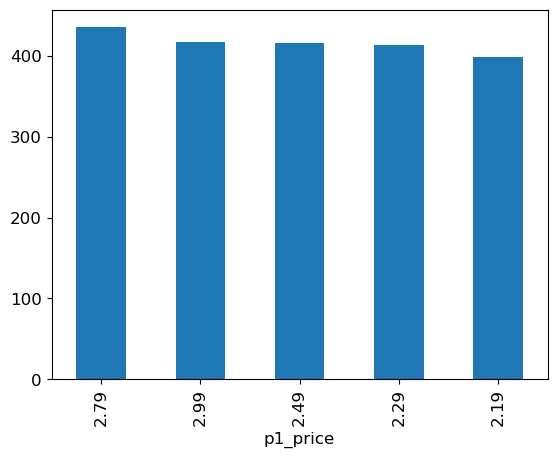

In [66]:
#Discrete variables
#How many times product 1 was observed on sales @ each price point
store_sales.p1_price.value_counts()
#Storing the value count as own object
p1_table_0 = store_sales.p1_price.value_counts()
p1_table_0
type(p1_table_0) #shows the type

#Plot a bar chart
p1_table_0.plot.bar()

#cross tab to answer how often ea. prod. was promoted at each pricepoint
pd.crosstab(store_sales.p1_promo,store_sales.p1_price)
#More common than cross tab
store_sales.groupby('p1_promo').p1_price.value_counts().unstack()

#mean price by country, prod., promo. using group by
store_sales.groupby(['p1_promo','country']).p1_price.mean().unstack()

#exact time product 1 is promotion at each price point
p1_table_1 = store_sales.groupby('p1_promo').p1_price.value_counts()
p1_table_1 = p1_table_1.unstack()
p1_table_1.div(p1_table_0)

In [67]:
#Continuous Variables

#Extremes:
#Minimum Value
print(store_sales.p2_sales.min())
#Maximum Value
print(store_sales.p2_sales.max())

#Central Tendencies
# The Mean
print(store_sales.p2_sales.mean())
# The Median
print(store_sales.p2_sales.median())

#Dispersion
#Variance around the mean
print(store_sales.p2_sales.var())
#Standard Deviation
print(store_sales.p2_sales.std())
#Median Absolute Deviation
print(store_sales.p2_sales.sub(store_sales.p2_sales.mean()).abs().mean())

#points
#Percentiles
print(store_sales.p2_sales.quantile(q=[0.25,0.5,0.75]))
print(store_sales.p1_sales.quantile(q = [0.5,0.95]))
#we can use sequences, find every 10th percentile 
store_sales.p1_sales.quantile(q=np.arange(0,1.1,0.1))

#pandas doesnt have built in IQR so we create one
def iqr(x):
    return x.quantile(0.75) - x.quantile(0.25)

iqr(store_sales.p1_sales)

#summarry statistics for sales with mediann and IQR 
# create a new df to hold all of 
pd.DataFrame([[store_sales.p1_sales.median(),
               store_sales.p2_sales.median()],
               [iqr(store_sales.p1_sales),
                iqr(store_sales.p2_sales)]],
                index = ['Median Sales','IQR'],
                columns = ['p1_sales','p2_sales'])


50.0
207.0
99.45769230769231
97.0
529.2074444074428
23.00450921900841
18.328102810650886
0.25     83.0
0.50     97.0
0.75    114.0
Name: p2_sales, dtype: float64
0.50    128.0
0.95    184.0
Name: p1_sales, dtype: float64


,p1_sales,p2_sales
Median Sales,128.0,97.0
IQR,38.0,31.0


In [68]:
#Sumarizing DataFrames

In [69]:
#descibe

store_sales.describe()
store_sales.p1_price.describe()

count    2080.000000
mean        2.555721
std         0.299788
min         2.190000
25%         2.290000
50%         2.490000
75%         2.790000
max         2.990000
Name: p1_price, dtype: float64

In [70]:
#apply()
store_sales.iloc[:,3:9].mean()

#apply lets us apply a function
store_sales.iloc[:,3:9].apply(iqr)

#apply an annonymous function
store_sales.iloc[:,3:9].apply(lambda x: x.mean() - x.median())

pd.DataFrame([store_sales[['p1_sales','p2_sales']].median(),
              store_sales[['p1_sales','p2_sales']].apply(iqr)],
              index = ['Median sales','IQR'])

,p1_sales,p2_sales
Median sales,128.0,97.0
IQR,38.0,31.0


<Axes: >

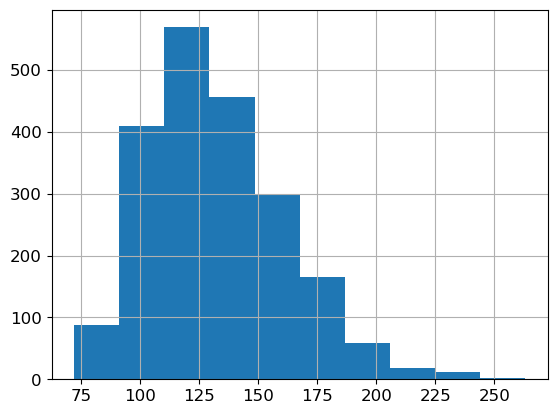

In [71]:
#Single Variable Visualization
#Histograms
 
store_sales.p1_sales.hist()

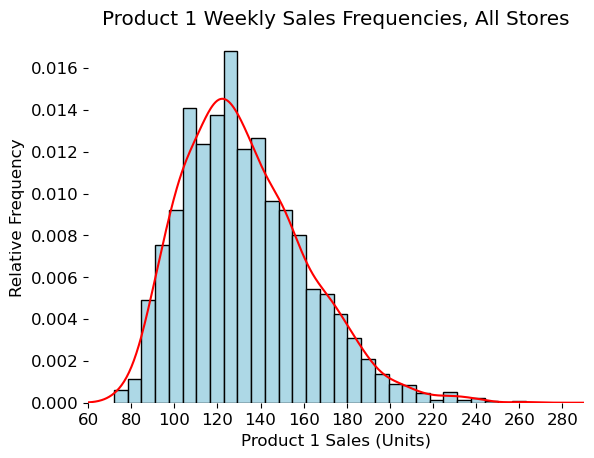

In [72]:
import matplotlib.pyplot as plt
from matplotlib import colors

#color mapping for matplot
#colors.get_named_colors_mapping()

#Adding bins and colors
store_sales.p1_sales.hist(bins = 30, #set number of bins
                          edgecolor = 'k', #set the bar border color
                          facecolor = 'lightblue', # set color of bars
                          density = True)
#Adding density curve
store_sales.p1_sales.plot.density(color = 'red')
#Adding labels to the chart
plt.title('Product 1 Weekly Sales Frequencies, All Stores')
plt.xlabel('Product 1 Sales (Units)')
plt.ylabel('Relative Frequency')
#Set Font Size
plt.rcParams.update({'font.size':12})
#Sets the x.ticks
plt.xticks(range(60, 300, 20)) # adds more tick marks start at 60, go to 300, interval 20
#Used to specify x-axis range
plt.xlim(60,290) #the start and end of the plot
#Removing the grid and box
plt.grid(False)
plt.box(False)


In [73]:
# Function for creating a detailed histogram
      # Need to create a basic histogram first to know the limits
def histo(df, x, bins, facecolor, 
          density, denscolor, title, xlabel,
          ylabel,start, end,interval):
    
    # Plot histogram
    df[x].hist(bins=bins,                    # Number of bins
               edgecolor='k',                # Border color = black
               facecolor=facecolor,          # Color of the bars
               density=density)              # True or False if you want density
    
    # Plot density curve
    df[x].plot.density(color=denscolor)      # Color of the denisty line
    
    # Chart labels and formatting
    plt.title(title)                         # Title of the chart
    plt.xlabel(xlabel)                       # X axis label
    plt.ylabel(ylabel)                       # Y axis label
    plt.xticks(range(start, end, interval))  # Range of the ticks & interval
    plt.xlim(start, end)                     # The limit of the x-axis
    plt.grid(False)                          # Removes the grid
    plt.box(False)                           # Removes the box around the chart

<Axes: >

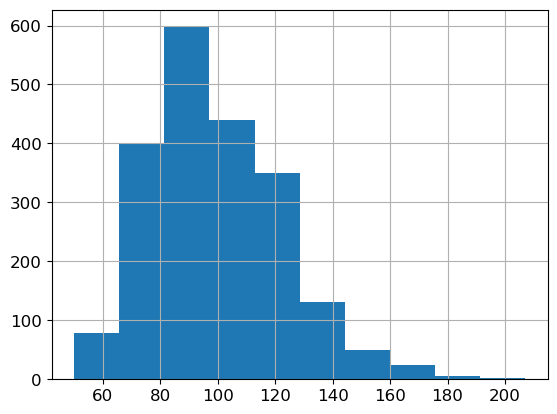

In [74]:
store_sales['p2_sales'].hist()

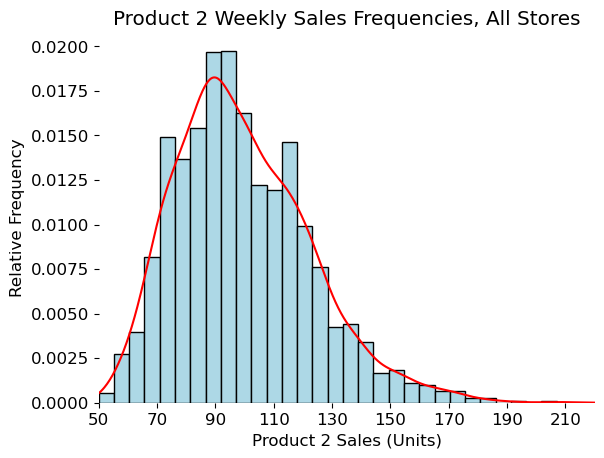

In [75]:
histo(df = store_sales,
      x = 'p2_sales', 
      bins = 30,
      facecolor = 'lightblue',
      density = True, 
      denscolor = 'red',
      title = 'Product 2 Weekly Sales Frequencies, All Stores',
      xlabel = 'Product 2 Sales (Units)', 
      ylabel = 'Relative Frequency',
      start = 50, 
      end = 220, 
      interval = 20)

/var/folders/m8/j9f34b0132b375sgqgzj51240000gn/T/ipykernel_81221/3474208172.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p = store_sales.plot.box(column = 'p2_sales',         # X-axis


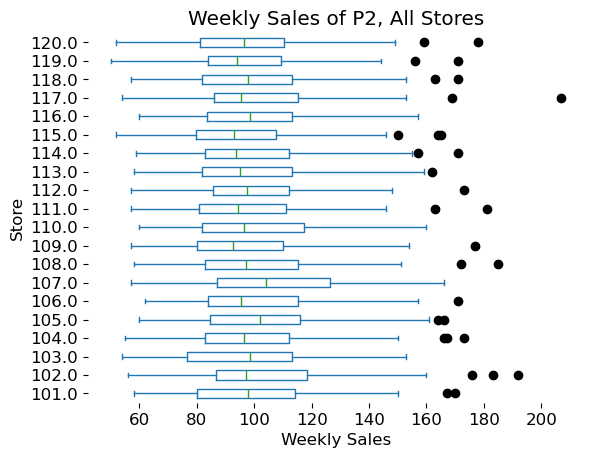

([<matplotlib.axis.YTick at 0x17e4faf90>,
 [Text(0, 1, 'No'), Text(0, 2, 'Yes')])

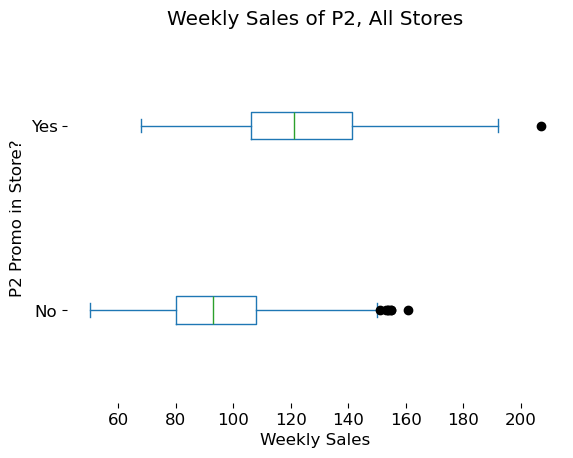

In [76]:
#Box Plots
# Compact way to represent density

p = store_sales.plot.box(column = 'p2_sales',         # X-axis
                                  by = 'store_num',   # Y-axis
                                  vert = False,       # Rotates 90 degrees for better viewing
                                  sym ='k')           # Specifies outlier marker
plt.title('Weekly Sales of P2, All Stores')
plt.suptitle('')                                      # Removes the default title
plt.xlabel('Weekly Sales')                            # X label
plt.ylabel('Store')                                   # Y Label
plt.box(False)                                        # Remove the box around the plot
plt.show()


p1 = store_sales.plot.box(column = 'p2_sales',        # X-axis
                                  by = 'p2_promo',    # Y-axis
                                  vert = False,       # Rotates 90 degrees for better viewing
                                  sym ='k')           # Specifies outlier marker
plt.title('Weekly Sales of P2, All Stores')
plt.suptitle('')                                      # Removes the default title
plt.xlabel('Weekly Sales')                            # X label
plt.ylabel('P2 Promo in Store?')                      # Y Label
plt.box(False)                                        # Remove the box around the plot
plt.yticks([1,2],['No','Yes'])                        # Sets the y Ticks to a string

((array([-3.40305173, -3.15273159, -3.01392984, ...,  3.01392984,
          3.15273159,  3.40305173]),
  array([4.27666612, 4.30406509, 4.30406509, ..., 5.48063892, 5.49716823,
         5.57215403])),
 (0.21096839000537343, 4.865319165500589, 0.9985169681034917))

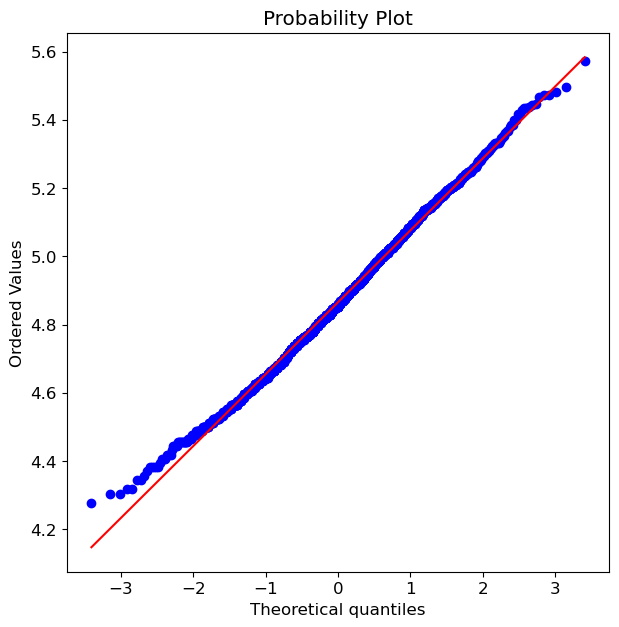

In [78]:
# QQ PLots
    # good way to check distribution by plotting
    # observed quantiles of your data against normal
    # distribution quantiles

from scipy import stats
plt.figure(figsize=(7,7)) # Sets how large the plot will be
stats.probplot(np.log(store_sales['p1_sales']),
                                  dist = 'norm',
                                  plot=plt)

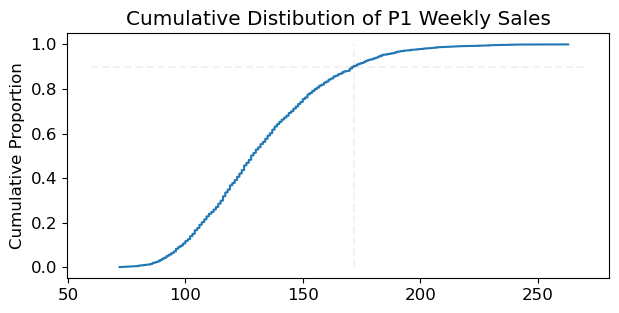

In [81]:
#Cumulative Distribution
    #shows the cumulative proportion of data values in your sample

from statsmodels.distributions.empirical_distribution import ECDF
e = ECDF(store_sales.p1_sales)
plt.figure(figsize=(7,7)) 
plt.subplot(2,1,1)
plt.plot(e.x,e.y)
plt.title('Cumulative Distibution of P1 Weekly Sales')
plt.ylabel('Cumulative Proportion')
plt.plot([60,270],[0.9,0.9],'k--', alpha = 0.05)
plt.plot([store_sales.p1_sales.quantile(.9),
          store_sales.p1_sales.quantile(.9)],[0,1],'k--',alpha = 0.05)


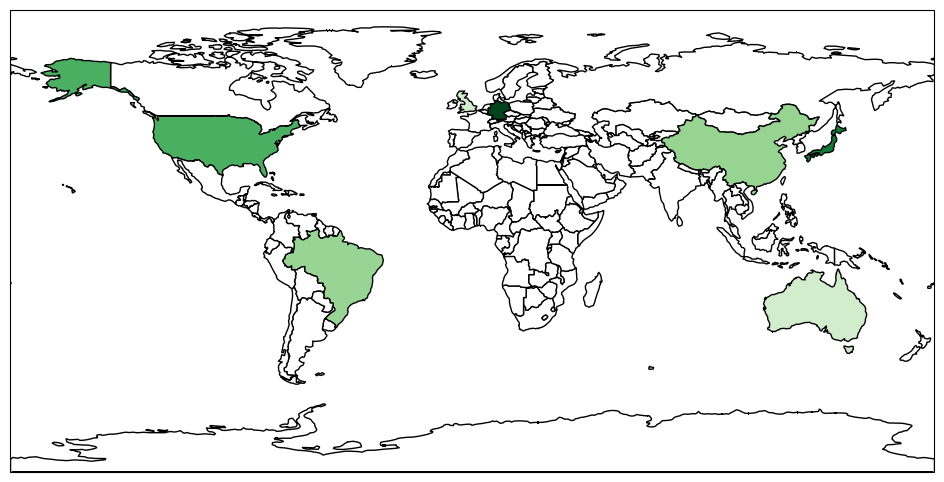

In [93]:
# Maps
    #choropleth map - uses color to indicate values of a variable income

from cartopy.io import shapereader
from cartopy import crs

plt.figure(figsize=(16,6))
ax = plt.axes(projection = crs.PlateCarree())

shpfile = shapereader.natural_earth(resolution='110m',
                                    category = 'cultural',
                                    name = 'admin_0_countries')
reader = shapereader.Reader(shpfile)
countries = reader.records()
max_sales = p1_sales_by_country.max()

for country in countries:
    country_name = country.attributes['ADM0_A3']
    if country_name in p1_sales_by_country :
        ax.add_geometries(country.geometry,crs.PlateCarree(),
                          facecolor = plt.cm.Greens(p1_sales_by_country[country_name]/max_sales),
                          edgecolor = 'k')
    else:
        ax.add_geometries(country.geometry,crs.PlateCarree(),
                          facecolor = 'w',
                          edgecolor = 'k')


In [ ]:
#Test Git
#See if this works